In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.

In [3]:
from wandb_utils import *
from data import *
from vector_rank import *

data = WandBData()
test_dataset = JSONLDataset(DATASET_TEST.path)

In [4]:
# priority_ids = {
#     "baseline_204800_0": "rz8j6338",
#     "baseline_102400_0": "ww4lz2hq",
#     "baseline_51200_0": "rknoro7p",
#     "baseline_25600_0": "79ewll41",
#     "baseline_12800_0": "mb54zzes",
#     "baseline_6400_0": "q0bnsa9i",
#     "baseline_3200_0": "av1hr46d",
#     "baseline_1600_0": "22lf9yct",
#     "baseline_800_0": "qavxlus6",
#     "c2d_0_12800": "i7ayd5ol",
#     "d2c_0_12800": "d7lvaqsg",
#     "subconcepts_0_12800": "58iyo3g4",
#     "c2d_6400_6400": "bn508p81",
#     "d2c_6400_6400": "um9xkwko",
#     "subconcepts_6400_6400": "x57jptft",
#     "hardpositive_6400_6400": "1rj7rcbg",
#     "hardnegative_6400_6400": "f38jezzc",
# }

priority_runs = {
    "rz8j6338": "baseline_204800_0",
    # "ww4lz2hq": "baseline_102400_0",
    # "rknoro7p": "baseline_51200_0",
    # "79ewll41": "baseline_25600_0",
    "mb54zzes": "baseline_12800_0",
    # "q0bnsa9i": "baseline_6400_0",
    # "av1hr46d": "baseline_3200_0",
    # "22lf9yct": "baseline_1600_0",
    "qavxlus6": "baseline_800_0",
    "i7ayd5ol": "c2d_0_12800",
    "79ewll41": "d2c_0_12800",
    "ly49r937": "subconcepts_0_12800",
    "bn508p81": "c2d_6400_6400",
    "um9xkwko": "d2c_6400_6400",
    "ml6cu0mg": "subconcepts_6400_6400",
    "1rj7rcbg": "hardpositive_6400_6400",
    "f38jezzc": "hardnegative_6400_6400",
}

paired_colors = sns.color_palette("Paired")
greyscale = ["#B0B0B0", "#606060", "#303030"]

color_scheme = {
    "baseline_204800_0": greyscale[2],
    "baseline_12800_0": greyscale[1],
    "baseline_800_0": greyscale[0],
    "c2d_0_12800": paired_colors[1],
    "d2c_0_12800": paired_colors[3],
    "subconcepts_0_12800": paired_colors[5],
    "c2d_6400_6400": paired_colors[0],
    "d2c_6400_6400": paired_colors[2],
    "subconcepts_6400_6400": paired_colors[4],
    "hardpositive_6400_6400": paired_colors[6],
    "hardnegative_6400_6400": paired_colors[8]
}

In [5]:
# data.refresh_data()
df = data.filtered_df(small=False, strategies=(np.nan,), overlap=False)
baseline_df = df[~df["has_synthetic_examples"]]

fully_synth_df = df[df["num_train_examples"] == 0]
fully_synth_df = fully_synth_df[fully_synth_df["num_synthetic_examples"] == 12800]
fully_synth_df = fully_synth_df.groupby("synthetic_dataset", as_index=False).first()

df = data.filtered_df(small=False, strategies=(np.nan, "paired"), overlap=False)
mixed_df = df[(df["num_train_examples"] == df["num_synthetic_examples"]) & (df["num_train_examples"] == 6400)]
mixed_df = mixed_df.groupby("synthetic_dataset", as_index=False).first()

runs_df = pd.concat((baseline_df, fully_synth_df, mixed_df), axis=0)
runs_df = runs_df.set_index("run_id")

priority_df = runs_df.loc[priority_runs.keys()]
# runs_df

In [6]:
priority_df

,run_name,created_at,output_dir,synthetic_dataset_strategy,fp16,overwrite_output_dir,mlm,no_cuda,gradient_checkpointing,per_gpu_eval_batch_size,...,epoch_step,_step,eval_mrr,eval_loss,example_step,eval_mrr_max,has_synthetic_examples,num_total_examples,synthetic_dataset,overlap
run_id,,,,,,,,,,,,,,,,,,,,,
rz8j6338,misty-field-43,2023-08-01 12:20:03,/disk/scratch_big/s2334723/saved_models_64_0/b...,NaN,False,False,False,False,True,64.0,...,2149.0,8549.0,{'max': 0.4104803386867704},{'min': 0.9007710814476012},547200.0,NaN,False,204800.0,NaN,False
mb54zzes,twilight-mountain-38,2023-08-01 12:17:54,/disk/scratch_big/s2334723/saved_models_64_0/b...,NaN,False,False,False,False,True,64.0,...,149.0,2349.0,{'max': 0.32793673237008675},{'min': 1.327389359474182},150400.0,NaN,False,12800.0,NaN,False
qavxlus6,hearty-night-41,2023-08-01 12:19:13,/disk/scratch_big/s2334723/saved_models_64_0/b...,NaN,False,False,False,False,True,64.0,...,3.0,3799.0,{'max': 0.2528227427060224},{'min': 1.944727897644043},233856.0,NaN,False,800.0,NaN,False
i7ayd5ol,eternal-violet-292,2023-08-19 00:42:06,/disk/scratch_big/s2334723/saved_models_64_0/c...,None,False,False,False,False,True,64.0,...,199.0,2199.0,{'max': 0.300210132410227},{'min': 1.807183623313904},140800.0,NaN,True,12800.0,c2d_semisynthetic,False
79ewll41,clear-oath-37,2023-08-01 12:17:31,/disk/scratch_big/s2334723/saved_models_64_0/b...,NaN,False,False,False,False,True,64.0,...,149.0,2549.0,{'max': 0.3403989064642429},{'min': 1.1503725051879885},163200.0,NaN,False,25600.0,NaN,False
ly49r937,misunderstood-frost-318,2023-08-21 00:09:56,/disk/scratch_big/s2334723/saved_models_64_0/s...,None,False,False,False,False,True,64.0,...,49.0,2049.0,{'max': 0.2534699760184005},{'min': 1.6388351917266846},131200.0,NaN,True,12800.0,subconcepts_8_synthetic,False
bn508p81,warm-butterfly-259,2023-08-18 12:16:42,/disk/scratch_big/s2334723/saved_models_64_0/c...,None,False,False,False,False,True,64.0,...,149.0,4349.0,{'max': 0.3192529565390853},{'min': 1.4137160778045654},278400.0,NaN,True,12800.0,c2d_semisynthetic,False
um9xkwko,prime-terrain-297,2023-08-20 00:27:43,/disk/scratch_big/s2334723/saved_models_64_0/d...,None,False,False,False,False,True,64.0,...,149.0,2749.0,{'max': 0.3124642497033146},{'min': 1.3359023332595823},176000.0,NaN,True,12800.0,d2c_semisynthetic,False
ml6cu0mg,visionary-feather-328,2023-08-22 06:22:01,/disk/scratch_big/s2334723/saved_models_64_0/s...,None,False,False,False,False,True,64.0,...,99.0,2699.0,{'max': 0.29096867421187456},{'min': 1.5506678819656372},172800.0,NaN,True,12800.0,subconcepts_8_synthetic,False


In [ ]:
# find entries with duplicate test_mrr values
df = data.filtered_df()

duplicates = df[df.duplicated(subset=["test_mrr"], keep=False)]

In [82]:
c2d_0_12800 = RunData("i7ayd5ol")
c2d_0_12800.refresh_data()
c2d_0_12800.recalculate_predictions = True
rs = c2d_0_12800.correct_rank
calc_mrr(rs)

wandb: Downloading large artifact run-i7ayd5ol-nl_vecs:latest, 52.32MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:0.3
wandb: Downloading large artifact run-i7ayd5ol-code_vecs:latest, 52.34MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:3.0


0.24046584123608303

In [79]:
# c2d_0_12800.__dict__.pop("ranks", None)
rs = c2d_0_12800.correct_rank
calc_mrr(rs)

0.24046584123608303

In [7]:
run_datas = {name: RunData(run_id) for run_id, name in priority_runs.items()}

In [9]:
for name, run_data in run_datas.items():
    print(name, run_data.run_id, run_data.correct_rank)

baseline_204800_0 rz8j6338 [14. nan  1. ...  1. nan nan]
baseline_12800_0 mb54zzes [54. nan  9. ...  0. 75. nan]
baseline_800_0 qavxlus6 [nan nan 91. ...  1. nan nan]
c2d_0_12800 i7ayd5ol [92. nan nan ...  0. 70. nan]
d2c_0_12800 79ewll41 [nan nan  4. ...  2. 27. nan]
subconcepts_0_12800 ly49r937 [nan nan nan ... nan 40. nan]
c2d_6400_6400 bn508p81 [nan 89. 22. ...  5. 74. nan]
d2c_6400_6400 um9xkwko [53. nan  5. ...  3. 29. nan]
subconcepts_6400_6400 ml6cu0mg [98. nan  4. ...  7. nan nan]
hardpositive_6400_6400 1rj7rcbg [nan nan 14. ...  2. nan nan]


wandb:   1 of 1 files downloaded.  


hardnegative_6400_6400 f38jezzc [nan nan 21. ...  1. nan nan]


In [54]:
for name, run_data in run_datas.items():
    print(name, run_data.run_id, calc_mrr(run_data.correct_rank))

baseline_204800_0 rz8j6338 0.34780672870643586
baseline_12800_0 mb54zzes 0.26674892389013755
baseline_800_0 qavxlus6 0.20386447111661324
c2d_0_12800 i7ayd5ol 0.24046584123608303
d2c_0_12800 d7lvaqsg 0.20753079791456616
subconcepts_0_12800 58iyo3g4 0.15855832688839958
c2d_6400_6400 bn508p81 0.2641050307486053
d2c_6400_6400 um9xkwko 0.25678604765624025
subconcepts_6400_6400 x57jptft 0.2456311452348002
hardpositive_6400_6400 1rj7rcbg 0.2504497425244839
hardnegative_6400_6400 f38jezzc 0.27092741979764356


In [10]:
ranks = np.column_stack([run_data.correct_rank for run_data in run_datas.values()])
r_ranks = 1 / (ranks + 1)
r_ranks[np.isnan(r_ranks)] = 0

df = pd.DataFrame(r_ranks, columns=run_datas.keys())
df["mean"] = df.mean(axis=1)
df["std"] = df.std(axis=1)
df["function"] = [e['function'] for e in test_dataset]

ranks_df_extras = ["mean", "std", "function"]

ranks_df = df

In [ ]:
ranks_df.std(axis=0)

NameError: name 'ranks_df' is not defined

In [12]:
mean_df = ranks_df.sort_values("mean", ascending=False)

def print_examples(df, label_func=None):
    if label_func is None:
        def label_func(*args):
            return ""

    for idx, row in df.iterrows():
        print("========", label_func(idx, row))
        print(row['function'])


print("Easiest examples")
print_examples(mean_df.head(5))

print("\n\n\n\nHardest examples")
print_examples(mean_df.tail(5))

Easiest examples
def Func(arg_0):
        """
        Get information about maps of the robots.

        :return:
        """
        for arg_1 in arg_0.robots:
            arg_2 = (
                requests.get(urljoin(arg_0.ENDPOINT, 'users/me/robots/{}/maps'.format(arg_1.serial)),
                             headers=arg_0._headers))
            arg_2.raise_for_status()
            arg_0._maps.update({arg_1.serial: arg_2.json()})
def Func(arg_0, arg_1, arg_2,
                                           arg_3, arg_4):
        """
        Create a new grading standard for the passed course.

        https://canvas.instructure.com/doc/api/grading_standards.html#method.grading_standards_api.create
        """
        arg_5 = COURSES_API.format(arg_1) + "/grading_standards"
        arg_6 = {
            "title": arg_2,
            "grading_scheme_entry": arg_3,
            "as_user_id": arg_4
        }

        return GradingStandard(data=arg_0._post_resource(arg_5, arg_6))
def Func(arg_0

Most variable examples
======== 182
def Func(arg_0: arg_1, arg_2: arg_1, **arg_3) -> Callable[[arg_6[arg_1], arg_8, arg_8], pd.DataFrame]:
    """Build a function that handles downloading tabular data and parsing it into a pandas DataFrame.

    :param data_url: The URL of the data
    :param data_path: The path where the data should get stored
    :param kwargs: Any other arguments to pass to :func:`pandas.read_csv`
    """
    arg_4 = make_downloader(arg_0, arg_2)

    def get_df(arg_5: arg_6[arg_1] = None, arg_7: arg_8 = True, arg_9: arg_8 = False) -> pd.DataFrame:
        """Get the data as a pandas DataFrame.

        :param url: The URL (or file path) to download.
        :param cache: If true, the data is downloaded to the file system, else it is loaded from the internet
        :param force_download: If true, overwrites a previously cached file
        """
        if arg_5 is None and arg_7:
            arg_5 = arg_4(arg_9=arg_9)

        return pd.read_csv(
            arg_5 o

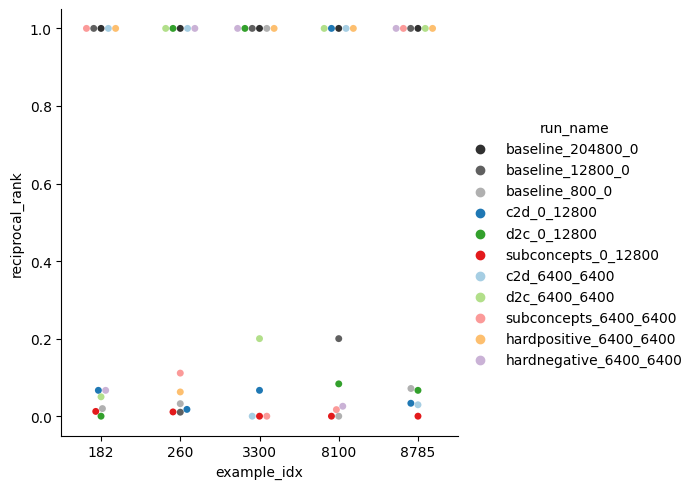

In [123]:
std_df = ranks_df.sort_values("std", ascending=False)

print("Most variable examples")
print_examples(std_df.head(5), lambda idx, row: f"{idx}")

# Plot the distribution of ranks for each run
# df = pd.DataFrame()
hard_df = std_df.drop(columns=ranks_df_extras).head(5).reset_index(names="example_idx")
std_long_df = pd.melt(hard_df, id_vars="example_idx", value_vars=hard_df.columns, var_name="run_name", value_name="reciprocal_rank")

g = sns.catplot(std_long_df, kind="swarm", hue="run_name", palette=color_scheme, y="reciprocal_rank", x="example_idx")

Most variable examples between hardnegative_6400_6400 and mean
======== [1.0 0.09556818181818182]
def Func(arg_0, arg_1, arg_2=False):
        '''Sample the annotation at specified times.

        Parameters
        ----------
        times : np.ndarray, non-negative, ndim=1
            The times (in seconds) to sample the annotation

        confidence : bool
            If `True`, return both values and confidences.
            If `False` (default) only return values.

        Returns
        -------
        values : list
            `values[i]` is a list of observation values for intervals
            that cover `times[i]`.

        confidence : list (optional)
            `confidence` values corresponding to `values`
        '''
        arg_1 = np.asarray(arg_1)
        if arg_1.ndim != 1 or np.any(arg_1 < 0):
            raise ParameterError('times must be 1-dimensional and non-negative')

        arg_3 = np.argsort(arg_1)
        arg_4 = arg_1[arg_3]

        arg_5 = [list() for 

/home/james/.pyenv/versions/3.8.16/envs/ML3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/james/.pyenv/versions/3.8.16/envs/ML3.8/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


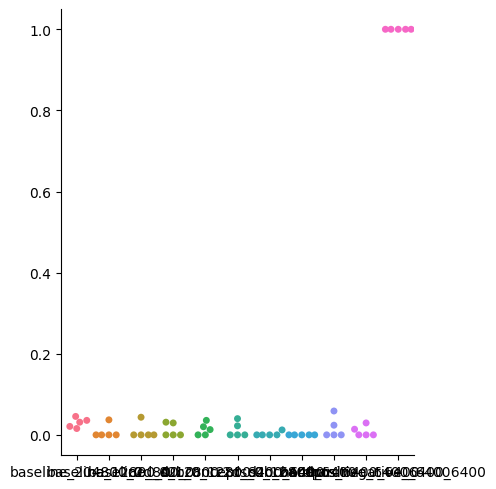

In [17]:
df = ranks_df.copy()
run_name = "hardnegative_6400_6400"
baseline = "mean"
df["diff"] = ranks_df[run_name] - ranks_df[baseline]
df = df.sort_values(by="diff", ascending=False)

print(f"Most variable examples between {run_name} and {baseline}")
print_examples(df.head(5), label_func=lambda idx, row: row[[run_name, baseline]].values)

# std_long_df = pd.melt(hard_df, id_vars="example_idx", value_vars=hard_df.columns, var_name="run_name", value_name="reciprocal_rank")

g = sns.catplot(
    df.drop(columns=["mean", "std", "diff"]).head(5),
    kind="swarm",
    # orient="h",
    # palette=color_scheme,
)